# ML for Classification hw03

## Dataset

In this homework, we will use the Bank Marketing dataset. Download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

We need to take `bank/bank-full.csv` file from the downloaded zip-file.
In this dataset our desired target for classification task will be `y` variable - has the client subscribed a term deposit or not.

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('bank-full.csv', sep=';')
df.shape

(45211, 17)

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Features

For the rest of the homework, we'll need to use only these columns:

* `age`,
* `job`,
* `marital`,
* `education`,
* `balance`,
* `housing`,
* `contact`,
* `day`,
* `month`,
* `duration`,
* `campaign`,
* `pdays`,
* `previous`,
* `poutcome`,
* `y`

## Data preparation

- Select only the features from above.
- Check if the missing values are presented in the features.

In [6]:
features = [
    'age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 
    'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'
]

In [7]:
df = df[features]

In [8]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


## Question 1

What is the most frequent observation (mode) for the column `education`?

In [11]:
df.describe(include=["O"])

,job,marital,education,housing,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,3,12,4,2
top,blue-collar,married,secondary,yes,cellular,may,unknown,no
freq,9732,27214,23202,25130,29285,13766,36959,39922


In [12]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Answer: **secondary**

## Question 2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `age` and `balance`
- `day` and `campaign`
- `day` and `pdays`
- `pdays` and `previous`

In [13]:
df_numeric = df.copy()
df_numeric = df_numeric.drop(['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome', 'y'], axis=1)
df_numeric.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
df_numeric.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


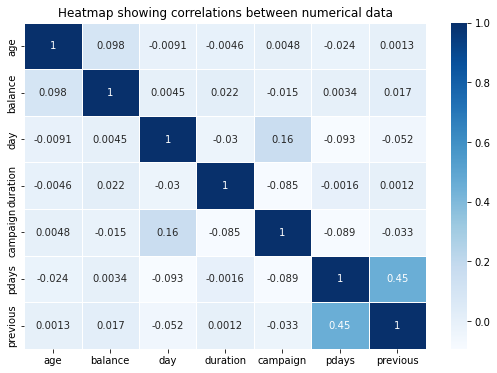

In [15]:
plt.figure(figsize=(9, 6))
sns.heatmap(df_numeric.corr(), cmap="Blues", annot=True, linewidths=.5)
plt.title('Heatmap showing correlations between numerical data')
plt.show();

In [16]:
df_numeric.corr().unstack().sort_values(ascending = False)

age       age         1.000000
balance   balance     1.000000
pdays     pdays       1.000000
campaign  campaign    1.000000
day       day         1.000000
duration  duration    1.000000
previous  previous    1.000000
          pdays       0.454820
pdays     previous    0.454820
campaign  day         0.162490
day       campaign    0.162490
age       balance     0.097783
balance   age         0.097783
          duration    0.021560
duration  balance     0.021560
balance   previous    0.016674
previous  balance     0.016674
age       campaign    0.004760
campaign  age         0.004760
balance   day         0.004503
day       balance     0.004503
balance   pdays       0.003435
pdays     balance     0.003435
previous  age         0.001288
age       previous    0.001288
duration  previous    0.001203
previous  duration    0.001203
pdays     duration   -0.001565
duration  pdays      -0.001565
age       duration   -0.004648
duration  age        -0.004648
age       day        -0.009120
day     

**Answer:** `pdays` and `previous`

## Target encoding

- Now we want to encode the `y` variable.
- Let's replace the values `yes`/`no` with `1`/`0`.

In [17]:
df.y = (df.y == 'yes').astype(int) # target encoding

In [18]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0


## Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`
* Make sure that the target value `y`is not in your dataframe

In [19]:
#Spliting the dataset
Seed = 42

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=Seed)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=Seed)

len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [20]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

In [22]:
y_train, y_val, y_test

(array([0, 0, 0, ..., 0, 1, 0]),
 array([0, 0, 1, ..., 0, 0, 1]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [23]:
df_train

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,32,technician,single,tertiary,1100,yes,cellular,11,aug,67,1,-1,0,unknown,0
1,38,entrepreneur,married,secondary,0,yes,cellular,17,nov,258,1,-1,0,unknown,0
2,49,blue-collar,married,secondary,3309,yes,cellular,15,may,349,2,-1,0,unknown,0
3,37,housemaid,married,primary,2410,no,cellular,4,aug,315,1,-1,0,unknown,0
4,31,self-employed,married,tertiary,3220,no,cellular,26,aug,74,4,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27121,27,services,single,secondary,167,no,cellular,8,jul,606,2,-1,0,unknown,0
27122,40,technician,single,tertiary,693,no,cellular,30,jan,427,1,-1,0,unknown,0
27123,54,technician,divorced,secondary,0,yes,unknown,16,may,161,1,-1,0,unknown,0
27124,25,services,single,secondary,2311,no,cellular,21,jul,1105,2,-1,0,unknown,1


## Question 3

- Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
- Round the scores to 2 decimals using `round(score, 2)`.

**Which of these variables has the biggest mutual information score?**

- `contact`
- `education`
- `housing`
- `poutcome`

In [24]:
#Defining function
def calculate_mi(series):
    return mutual_info_score(series, df_train.y)

In [25]:
#Preparing the dataset
cat = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

num = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [26]:
#Implementation
df_mi = df_train[cat].apply(calculate_mi)
df_mi = round(df_mi.sort_values(ascending=False).to_frame(name='MI'), 2)
df_mi

,MI
poutcome,0.03
month,0.03
contact,0.01
housing,0.01
job,0.01
education,0.00
marital,0.00


**Answer:** `poutcome` has the biggest MI score.

In [27]:
#Preparing the dataset
df_train = df_train.drop('y', axis=1)
df_val = df_val.drop('y', axis=1)
df_test = df_test.drop('y', axis=1)

## Question 4

- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset:
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

**What accuracy did you get?**

- 0.6
- 0.7
- 0.8
- 0.9

In [28]:
#Vectorizing the dataset
dv = DictVectorizer(sparse=False)
dfv_train = df_train.copy()
train_dict = dfv_train.to_dict(orient='records')
Xv_train = dv.fit_transform(train_dict)

In [29]:
#Training LR Model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(Xv_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [30]:
#Initializing model prediction
dfv_val = df_val.copy()
val_dict = dfv_val.to_dict(orient='records')
Xv_val = dv.transform(val_dict)

y_pred = model.predict(Xv_val)

In [31]:
#Inspecting accuracy
accuracy = np.round(accuracy_score(y_val, y_pred), 2)
print(f'Accuracy = {accuracy}')

Accuracy = 0.9


## Question 5

* Let's find the least useful feature using the _feature elimination_ technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

**Which of following feature has the smallest difference?**

* `age`
* `balance`
* `marital`
* `previous`


>**Note:** The difference doesn't have to be positive.

In [32]:
#Initializing features
features = df_train.columns.to_list()
features

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [33]:
#Inspecting the difference in accuracy
original_score = accuracy

scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])

for feature in features:
    subset = features.copy()
    subset.remove(feature)
    
    dv = DictVectorizer(sparse=False)
    dfv_train = df_train.copy()
    train_dict = dfv_train[subset].to_dict(orient='records')
    Xv_train = dv.fit_transform(train_dict)

    model = LogisticRegression(penalty='l2', solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(Xv_train, y_train)
    
    dfv_val = df_val.copy()
    val_dict = dfv_val[subset].to_dict(orient='records')
    Xv_val = dv.transform(val_dict)
    
    y_pred = model.predict(Xv_val)
    score = accuracy_score(y_val, y_pred)
    
    scores.loc[len(scores)] = [feature, score, original_score - score]

In [34]:
scores

,eliminated_feature,accuracy,difference
0,age,0.901017,-0.001017
1,job,0.901128,-0.001128
2,marital,0.900243,-0.000243
3,education,0.901017,-0.001017
4,balance,0.900796,-0.000796
5,housing,0.901017,-0.001017
6,contact,0.900354,-0.000354
7,day,0.901570,-0.001570
8,month,0.899580,0.000420
9,duration,0.890069,0.009931


**Answer:** `marital` feature has the smallest difference

## Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

**Which of these `C` leads to the best accuracy on the validation set?**

* 0.01
* 0.1
* 1
* 10
* 100

>**Note:** If there are multiple options, select the smallest `C`.

In [35]:
# prepare the numerical variables
X_train_num = df_train[num].values

scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train_num)

In [36]:
# process the categorical features
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_cat = ohe.fit_transform(df_train[cat].values)

In [37]:
ohe.get_feature_names()

array(['x0_admin.', 'x0_blue-collar', 'x0_entrepreneur', 'x0_housemaid',
       'x0_management', 'x0_retired', 'x0_self-employed', 'x0_services',
       'x0_student', 'x0_technician', 'x0_unemployed', 'x0_unknown',
       'x1_divorced', 'x1_married', 'x1_single', 'x2_primary',
       'x2_secondary', 'x2_tertiary', 'x2_unknown', 'x3_no', 'x3_yes',
       'x4_cellular', 'x4_telephone', 'x4_unknown', 'x5_apr', 'x5_aug',
       'x5_dec', 'x5_feb', 'x5_jan', 'x5_jul', 'x5_jun', 'x5_mar',
       'x5_may', 'x5_nov', 'x5_oct', 'x5_sep', 'x6_failure', 'x6_other',
       'x6_success', 'x6_unknown'], dtype=object)

In [38]:
# combine two matrices into one
Xr_train = np.column_stack([X_train_num, X_train_cat])

for C in [0.01, 0.1, 1, 10, 100]:
    
    model = LogisticRegression(penalty='l2', solver='lbfgs', C=C, random_state=42)
    model.fit(Xr_train, y_train)
    
    X_val_num = df_val[num].values
    X_val_num = scaler.transform(X_val_num)

    X_val_cat = ohe.transform(df_val[cat].values)
    
    
    X_val = np.column_stack([X_val_num, X_val_cat]) # combine two matrices into one
    
    y_pred = model.predict(X_val)
    score = (accuracy_score(y_val, y_pred))
    
    print('%06s, %0.3f' % (C, score))

  0.01, 0.899
   0.1, 0.901
     1, 0.900
    10, 0.900
   100, 0.900


**Answer:** The C=0.1 leads to the best accuracy 